Baseball Case Study

In [91]:
#Importing the required libraries. 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectPercentile
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import joblib

In [92]:
# reading the csv file to load the data from the dataframe. 
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [93]:
# checking the first 5 columns of the dataframe. 
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [94]:
# to check the size of the dataframe. 
df.shape

(30, 17)

In [95]:
# to check the rows and columns.
print(' The number of column in the dataframe : ',df.shape[1])
print(' The number of rows in the dataframe :   ',df.shape[0])

 The number of column in the dataframe :  17
 The number of rows in the dataframe :    30


In [96]:
# to check the count of null values in the dataframe.
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [97]:
# it is observed that there are no null values present in the dataframe. Hence, we can proceed with the further analysis. 

In [98]:
df.columns.tolist()

['W',
 'R',
 'AB',
 'H',
 '2B',
 '3B',
 'HR',
 'BB',
 'SO',
 'SB',
 'RA',
 'ER',
 'ERA',
 'CG',
 'SHO',
 'SV',
 'E']

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


<AxesSubplot:>

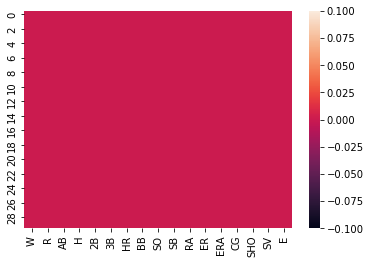

In [100]:
# representing the null values via the maps
sns.heatmap(df.isnull())

In [101]:
# to check the no. of unique values present in the data. 
df.nunique().to_frame("No. of unique value")

,No. of unique value
W,24
R,28
AB,29
H,29
2B,22
3B,23
HR,27
BB,29
SO,29
SB,27


In [102]:
# checking the value count for each columns by creating the for the for loop.
for i in df.columns: 
    print(df[i].value_counts())
    print('/n')

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64
/n
689    2
696    2
724    1
647    1
650    1
720    1
667    1
626    1
573    1
613    1
703    1
683    1
640    1
655    1
697    1
694    1
656    1
661    1
729    1
751    1
748    1
644    1
713    1
764    1
891    1
622    1
669    1
737    1
Name: R, dtype: int64
/n
5485    2
5575    1
5631    1
5457    1
5649    1
5565    1
5385    1
5529    1
5420    1
5463    1
5428    1
5527    1
5571    1
5480    1
5491    1
5484    1
5467    1
5600    1
5544    1
5417    1
5459    1
5511    1
5640    1
5567    1
5509    1
5605    1
5533    1
5439    1
5572    1
Name: AB, dtype: int64
/n
1363    2
1497    1
1386    1
1324    1
1494    1
1486    1
1346    1
1374    1
1361    1
1420    1
1351    1
1382    1
1378    1
1341    1
1462    1
1405    1
1349  

In [103]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


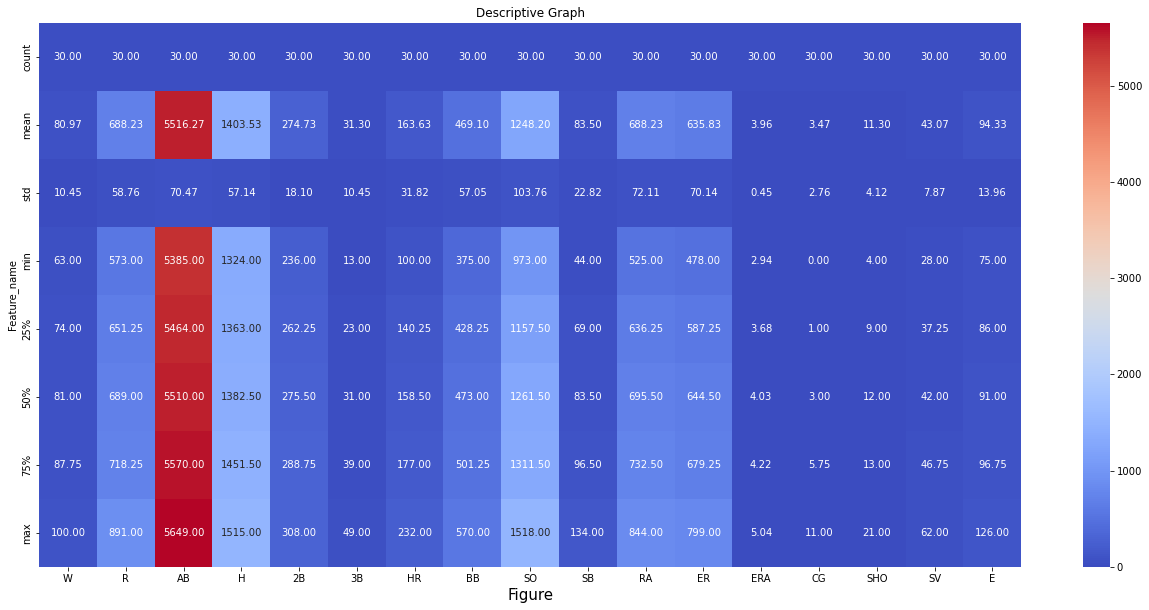

In [104]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(), annot=True, linecolor="black", cmap="coolwarm", fmt="0.2f")
plt.xlabel('Figure', fontsize=15)
plt.ylabel('Feature_name')
plt.title('Descriptive Graph')
plt.show()

In [ ]:
#To check the distribution of the data in every column
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1

for columns in df:
    if plotnumber<=17:             # since there are 11 columns in the data set
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df[columns])
        plt.xlabel(columns,fontsize=20)
    
    plotnumber+=1
plt.show()

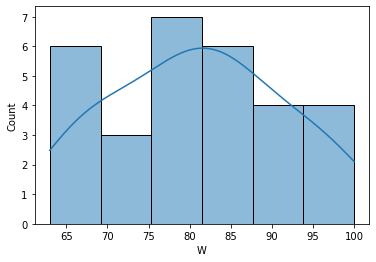

In [106]:
# Visualize the distribution of the target variable (number of wins)
sns.histplot(df['W'], kde=True)
plt.show()

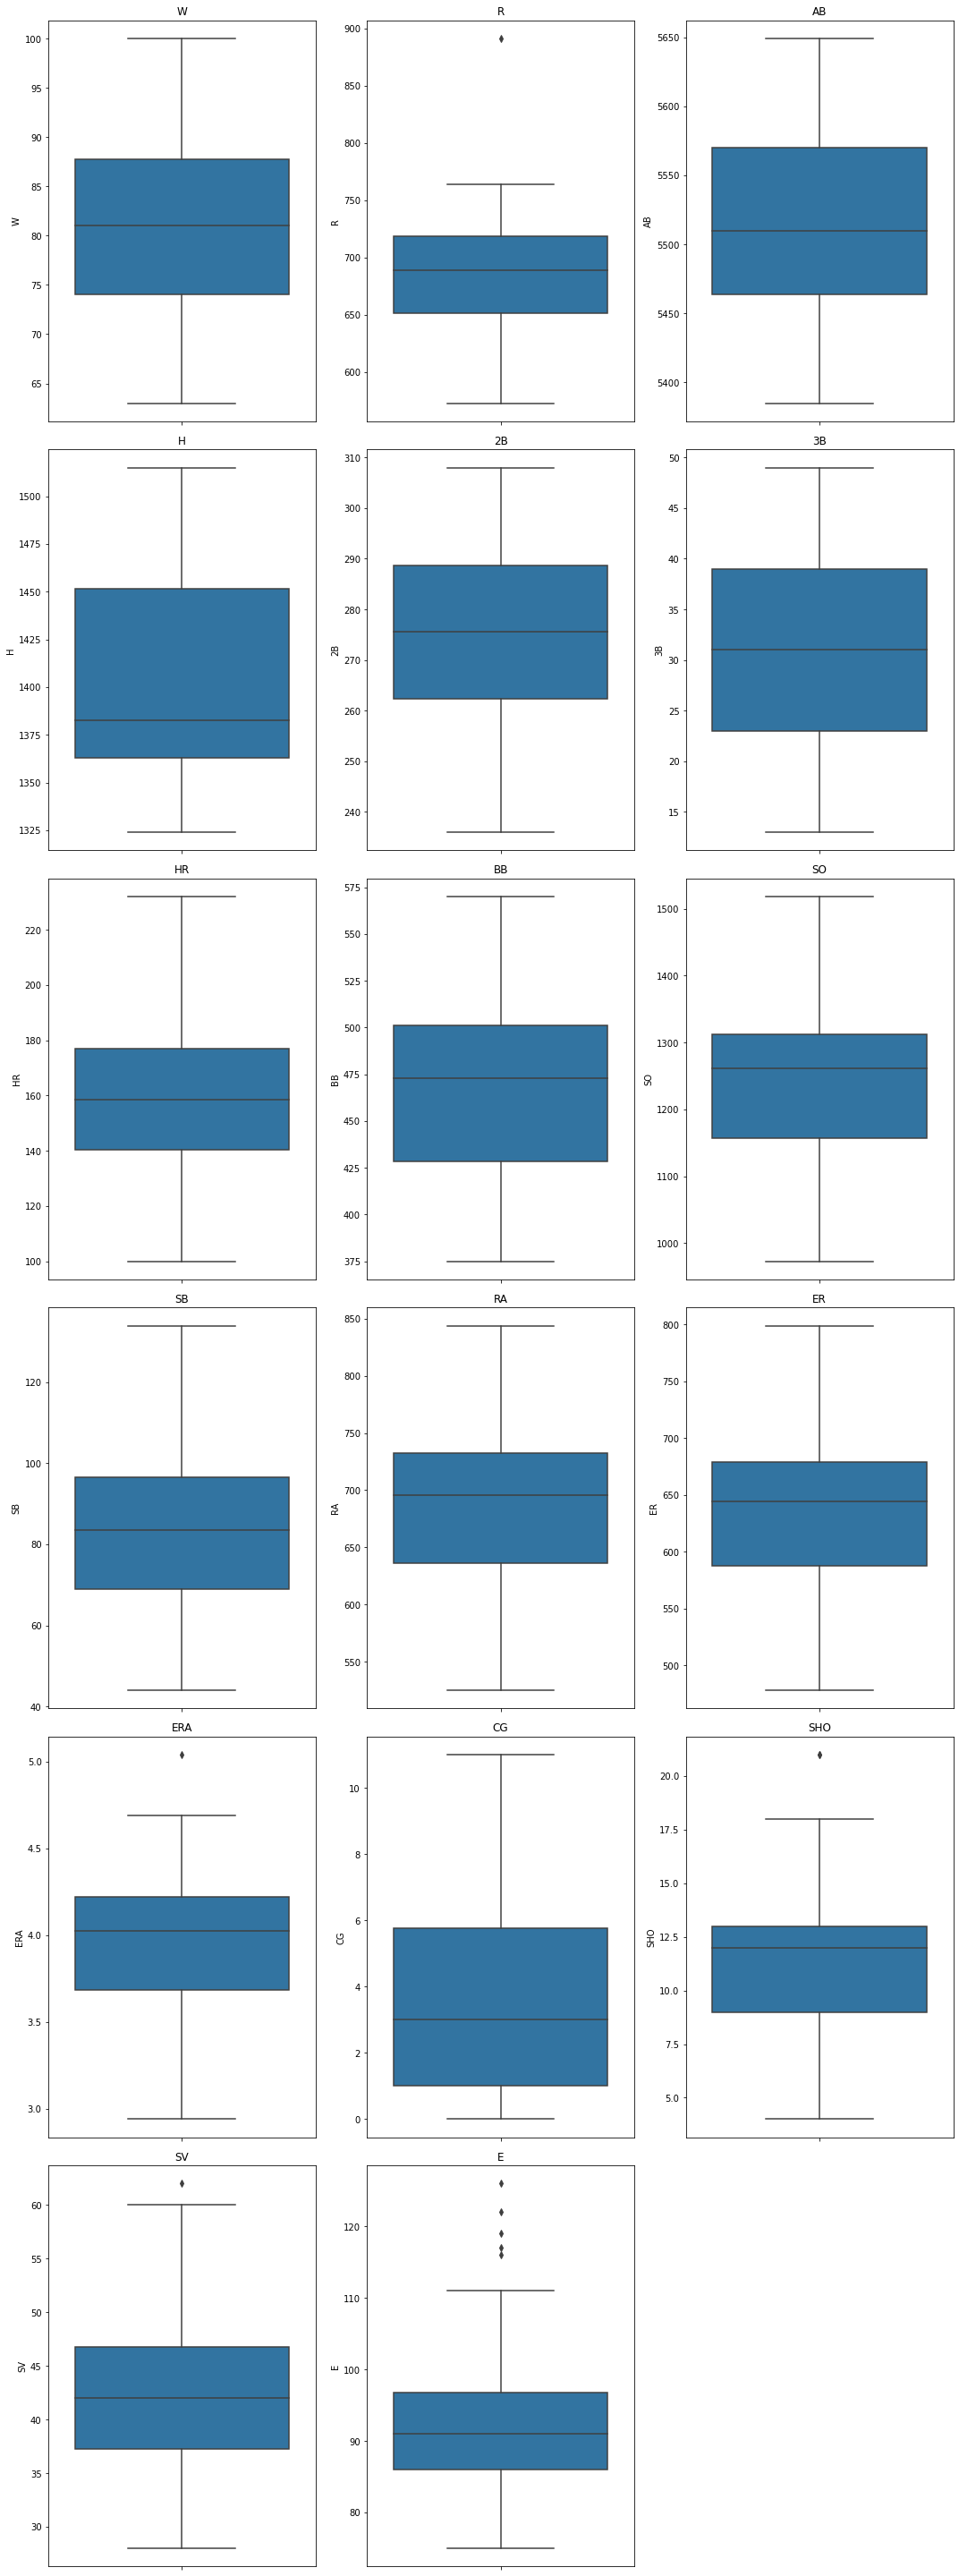

In [107]:
# Create box plots for each numerical feature
plt.figure(figsize=(15, 80), facecolor='white')
plotnumber = 1

for feature in df.select_dtypes(include=[np.number]).columns:
    ax = plt.subplot(12, 3, plotnumber)
    sns.boxplot(data=df, y=feature)
    plt.ylabel(feature)
    plt.title(f"{feature}")
    plotnumber += 1

plt.tight_layout()
plt.show()


In [108]:
#The target column seen to be distributed 

In [109]:
#divinding the data into the labels and the features. 
X = df.drop(columns=['W'])
Y = df['W']

In [110]:
X

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [111]:
skewness = df.skew()
print(skewness)

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64


In [112]:
#The threshold is taken as -0.65


In [113]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [114]:
unique_values = df['ERA'].unique()
unique_values

array([3.73, 4.07, 3.67, 3.98, 4.64, 3.8 , 4.03, 4.05, 3.74, 4.31, 4.24,
       3.57, 3.94, 4.16, 4.14, 2.94, 3.21, 3.36, 4.28, 4.33, 3.43, 3.62,
       4.02, 4.41, 4.69, 3.44, 3.72, 4.04, 4.09, 5.04])

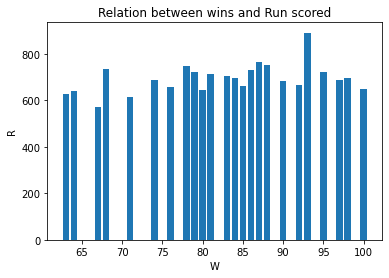

In [115]:
# Relation W (wins) and R (Run Scored )
plt.bar(df['W'], df['R'])
plt.xlabel('W')
plt.ylabel('R')
plt.title('Relation between wins and Run scored')
plt.show()

It is observed that the highest runs were scored when the Wins credited ranged 92-94.

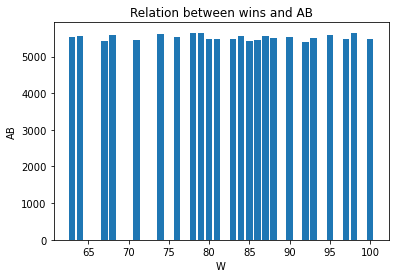

In [116]:
# Relation W (wiand R (at bat)
plt.bar(df['W'], df['AB'])
plt.xlabel('W')
plt.ylabel('AB')
plt.title('Relation between wins and AB')
plt.show()

It is observed that it follows the same trend througout. 

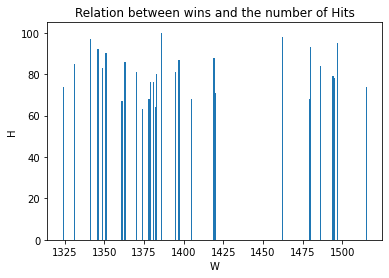

In [117]:
#H - the number of hits. 
plt.bar(df['H'], df['W'])
plt.xlabel('W')
plt.ylabel('H')
plt.title('Relation between wins and the number of Hits')
plt.show()

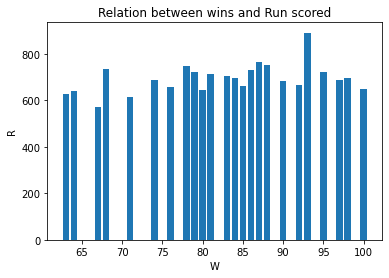

In [118]:
# Relation W (wins) and R (Run Scored )
plt.bar(df['W'], df['R'])
plt.xlabel('W')
plt.ylabel('R')
plt.title('Relation between wins and Run scored')
plt.show()

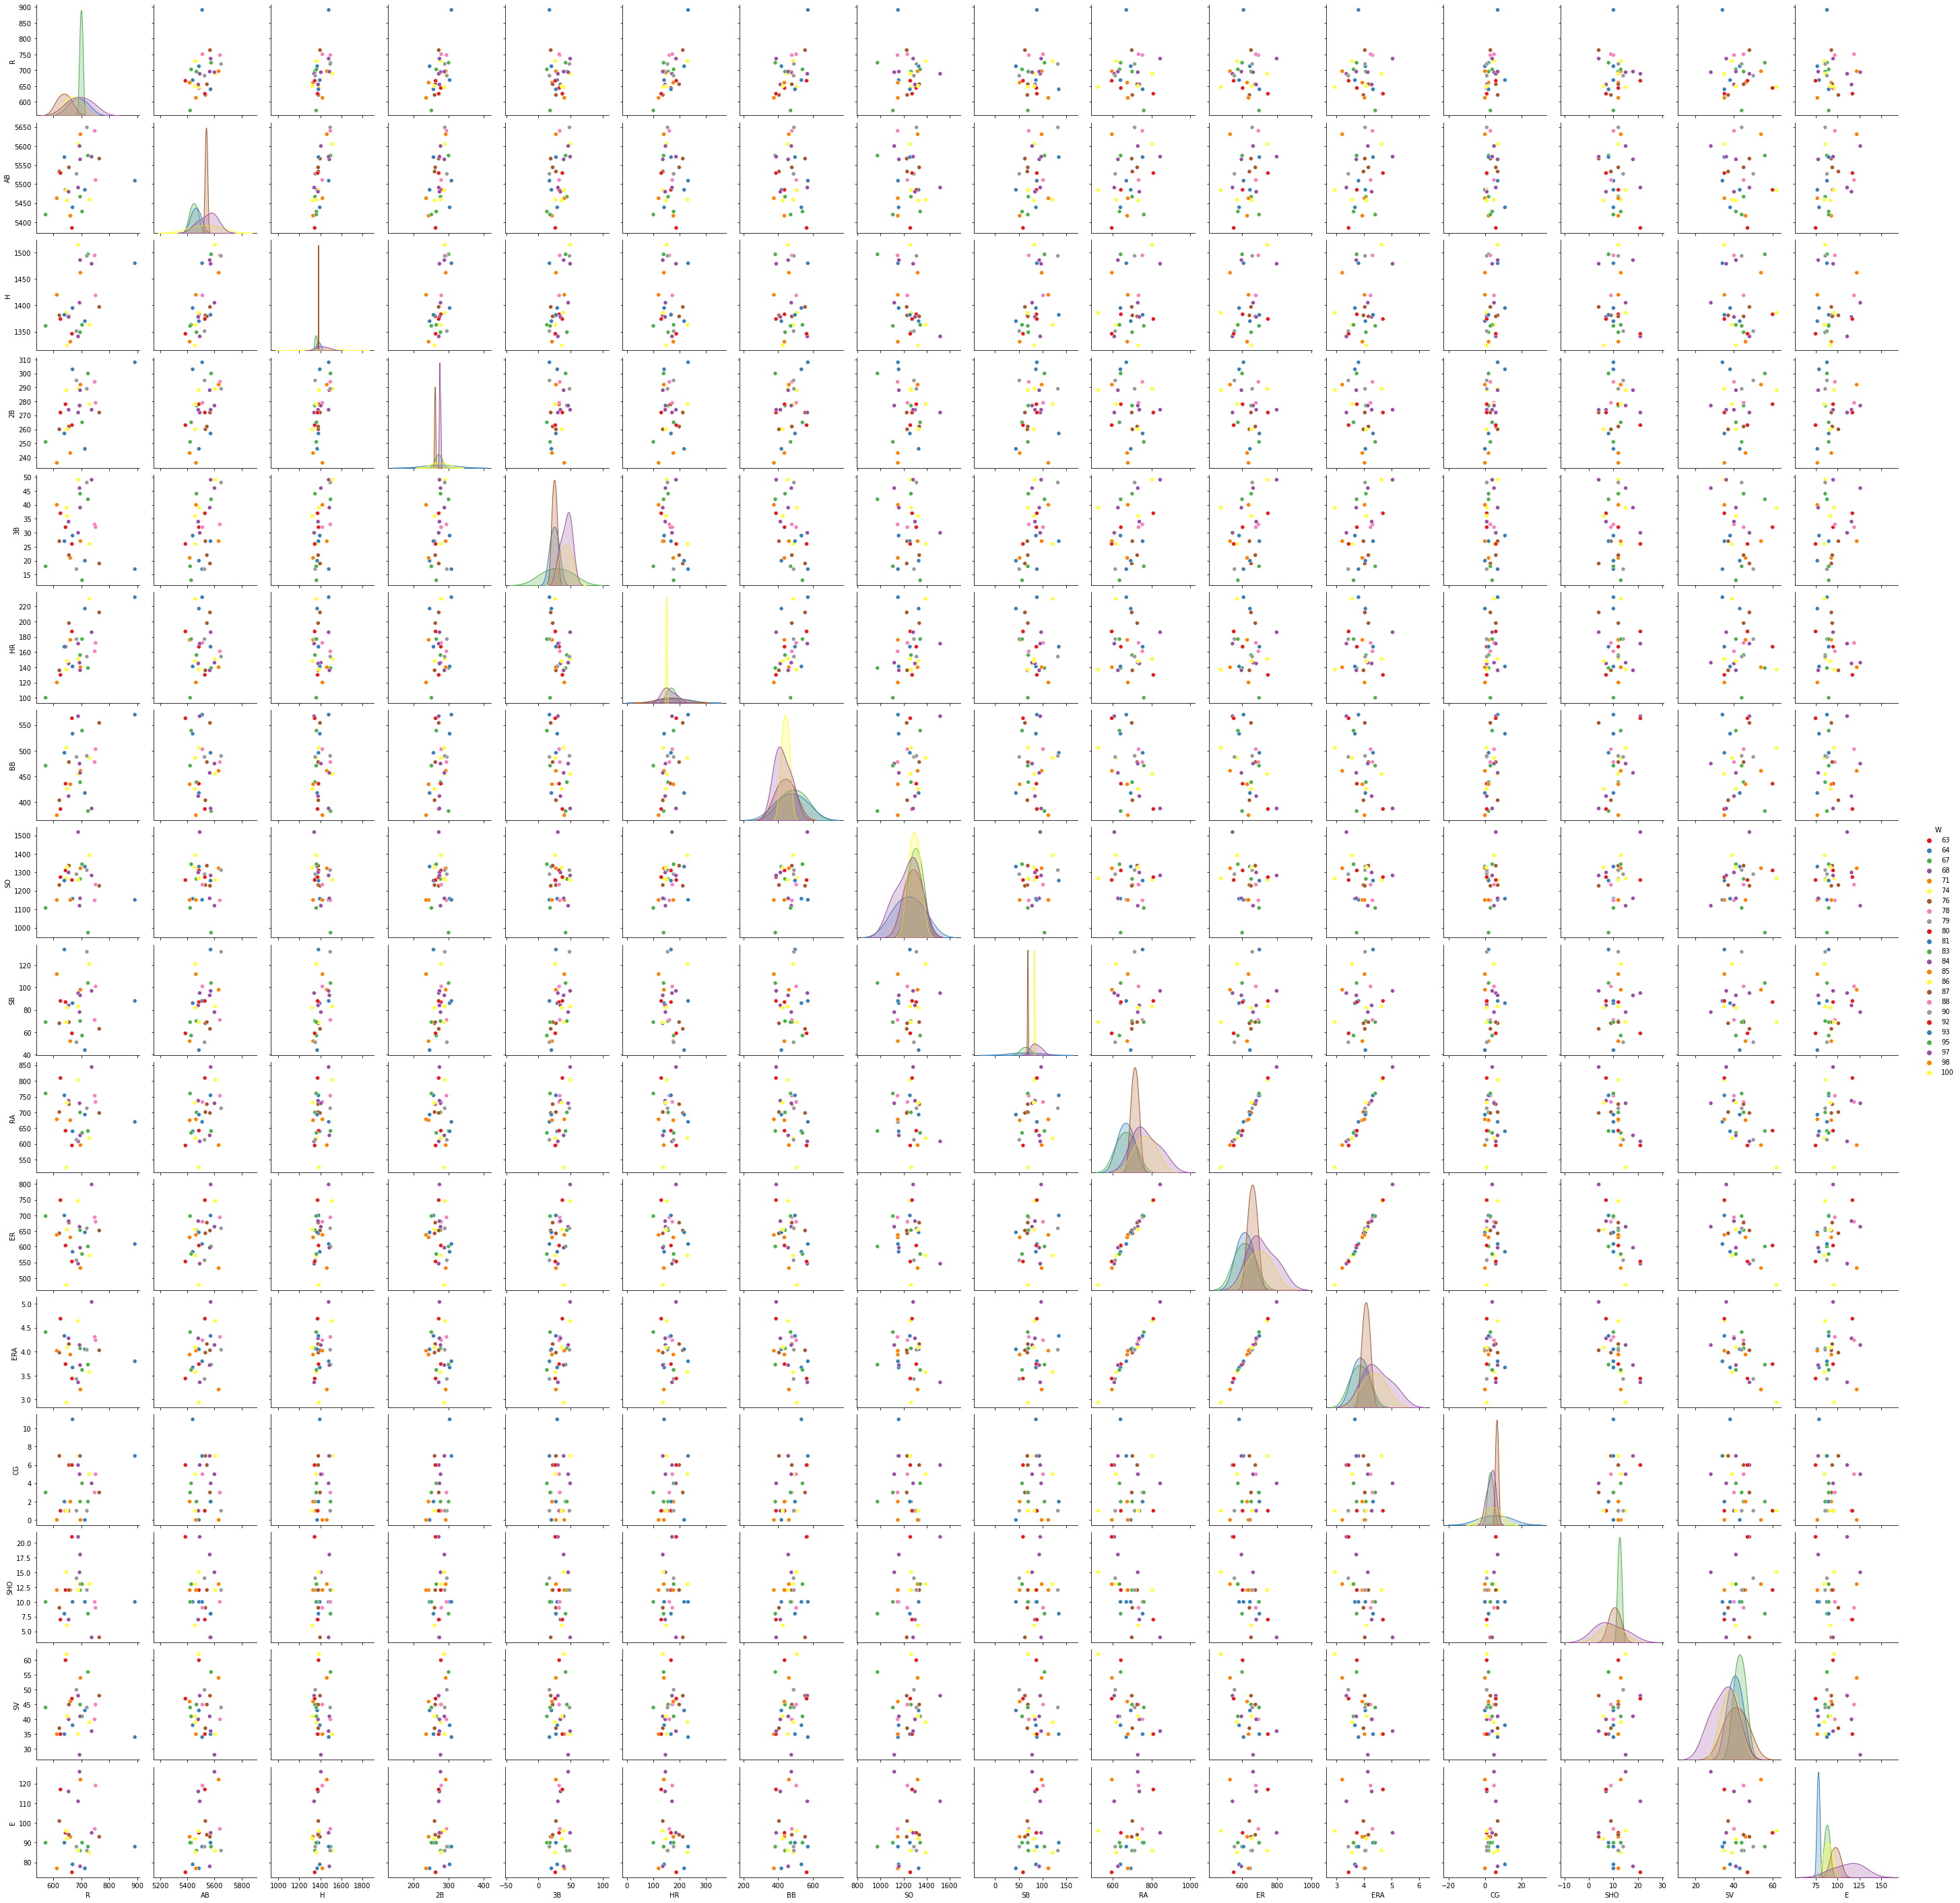

In [150]:
sns.pairplot(df,hue="W",palette="Set1")

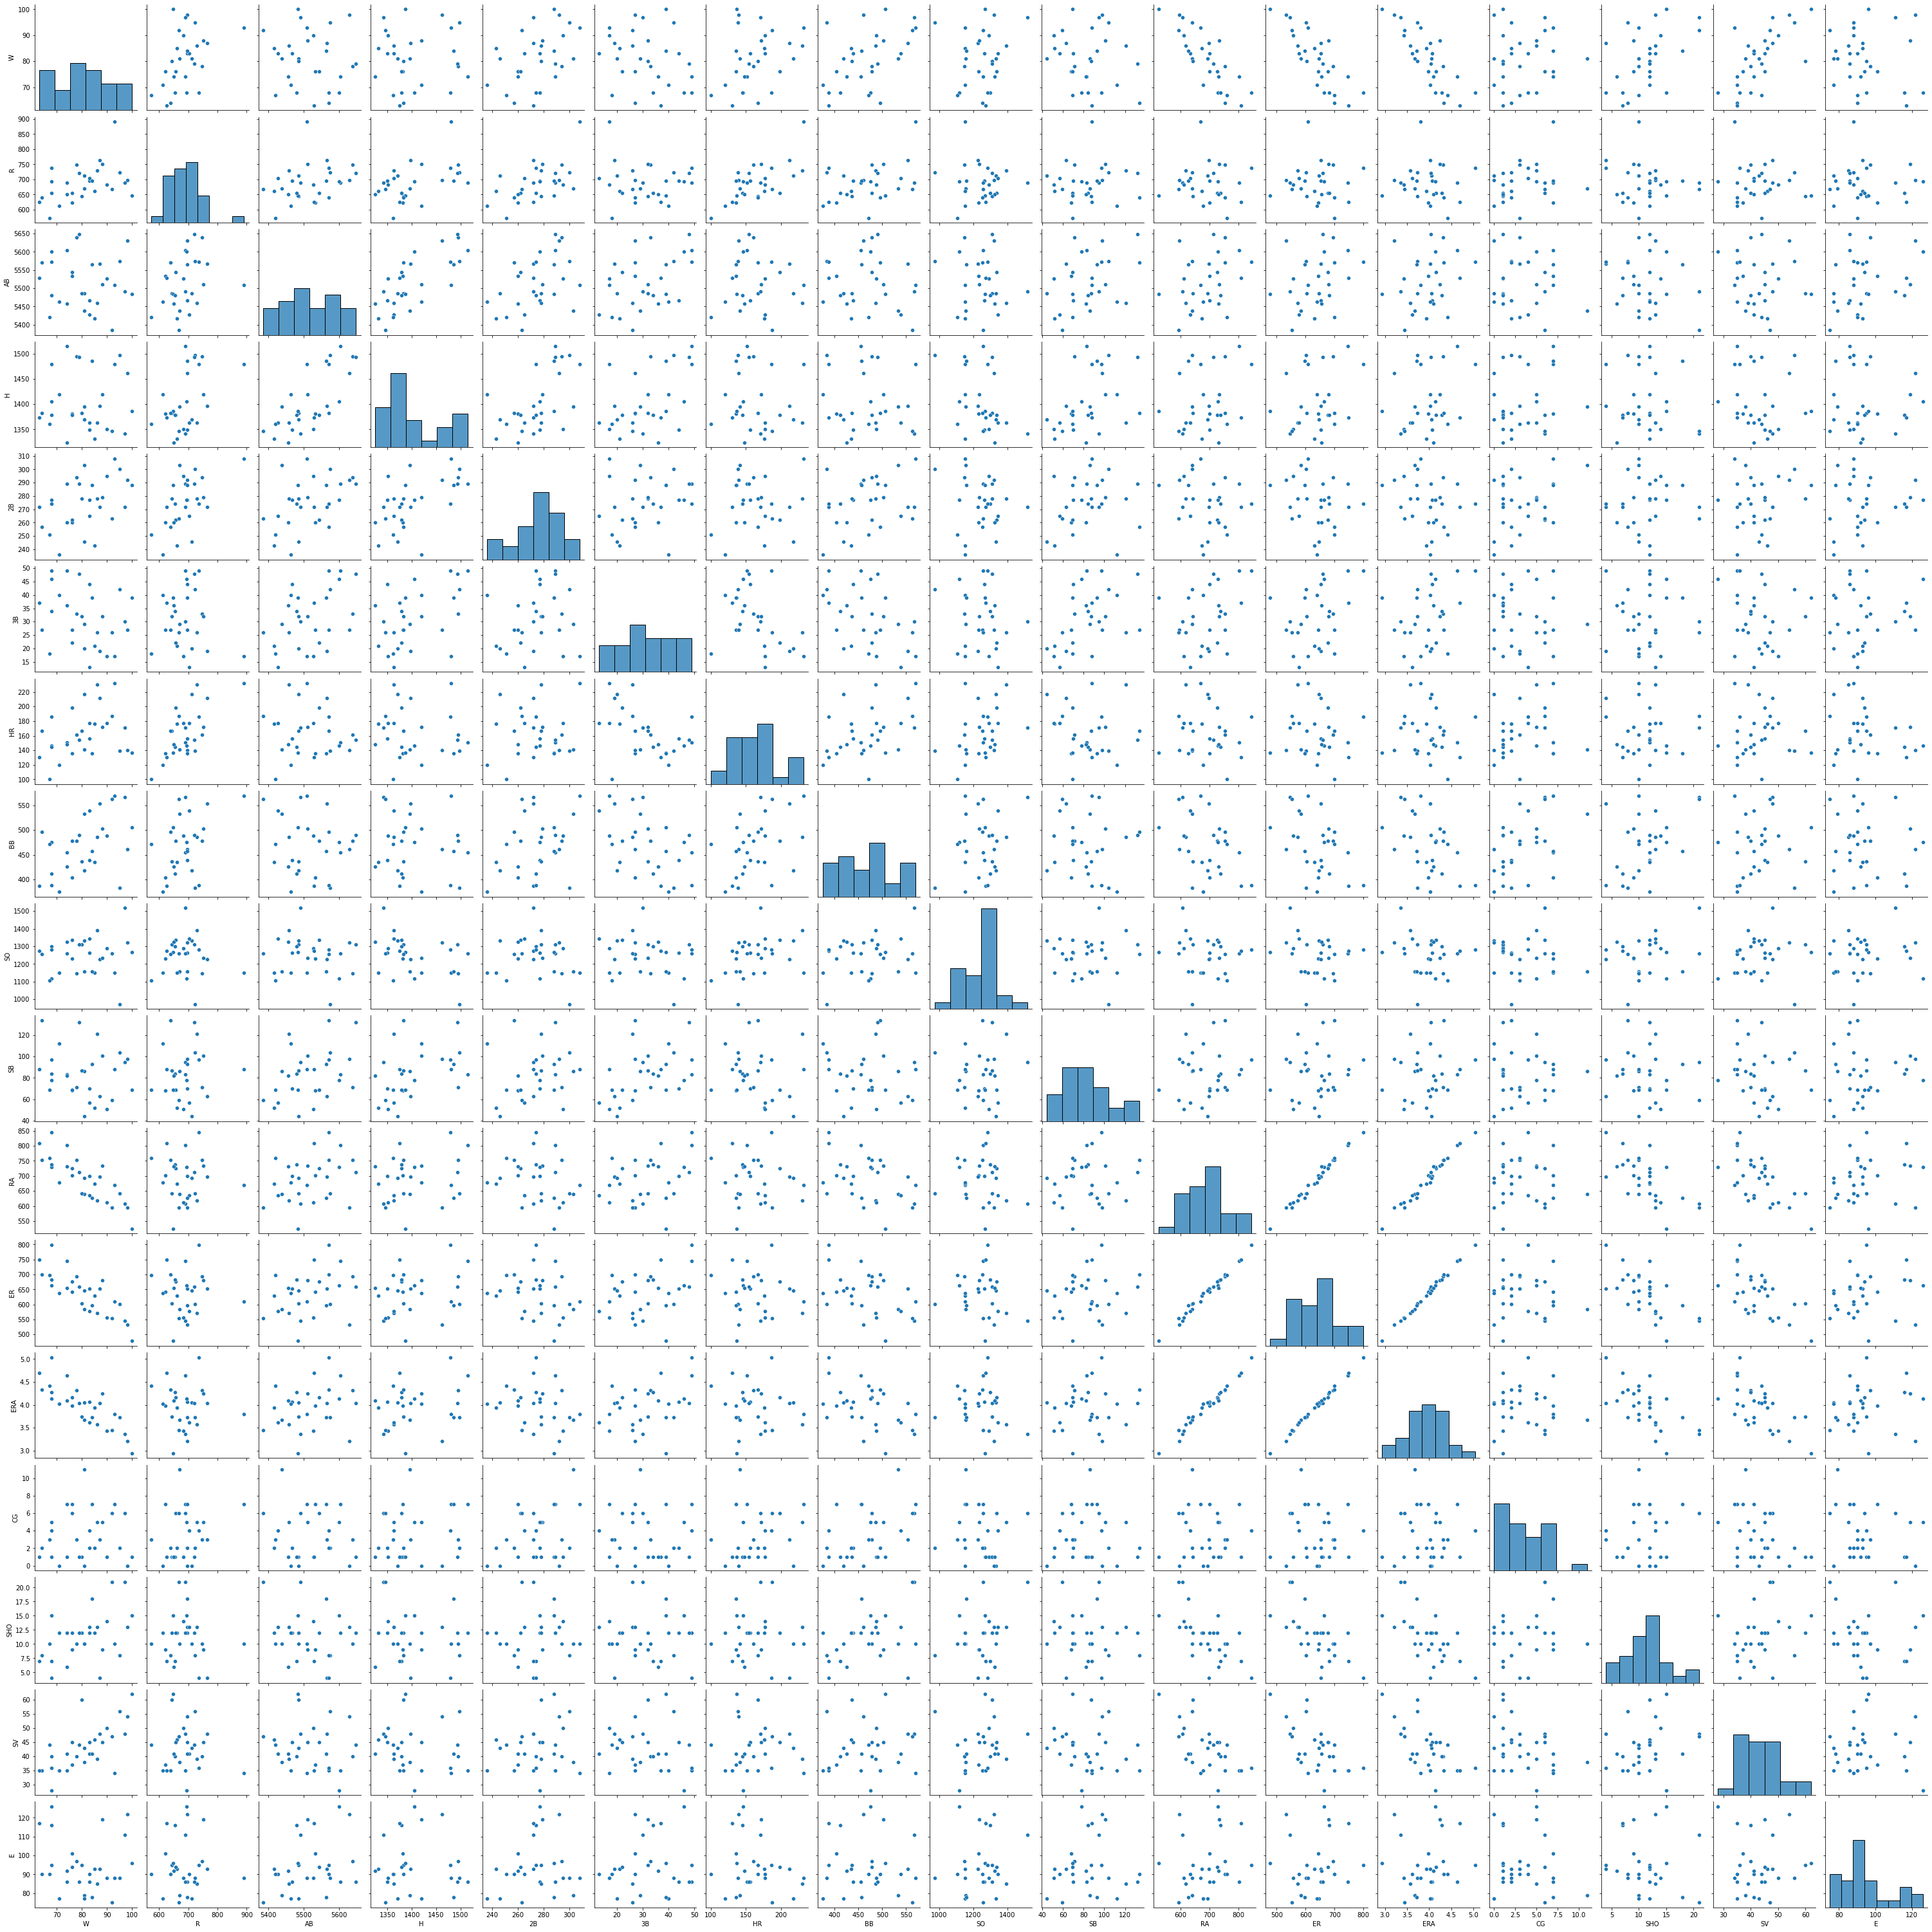

In [119]:
sns.pairplot(data=df,palette='park')

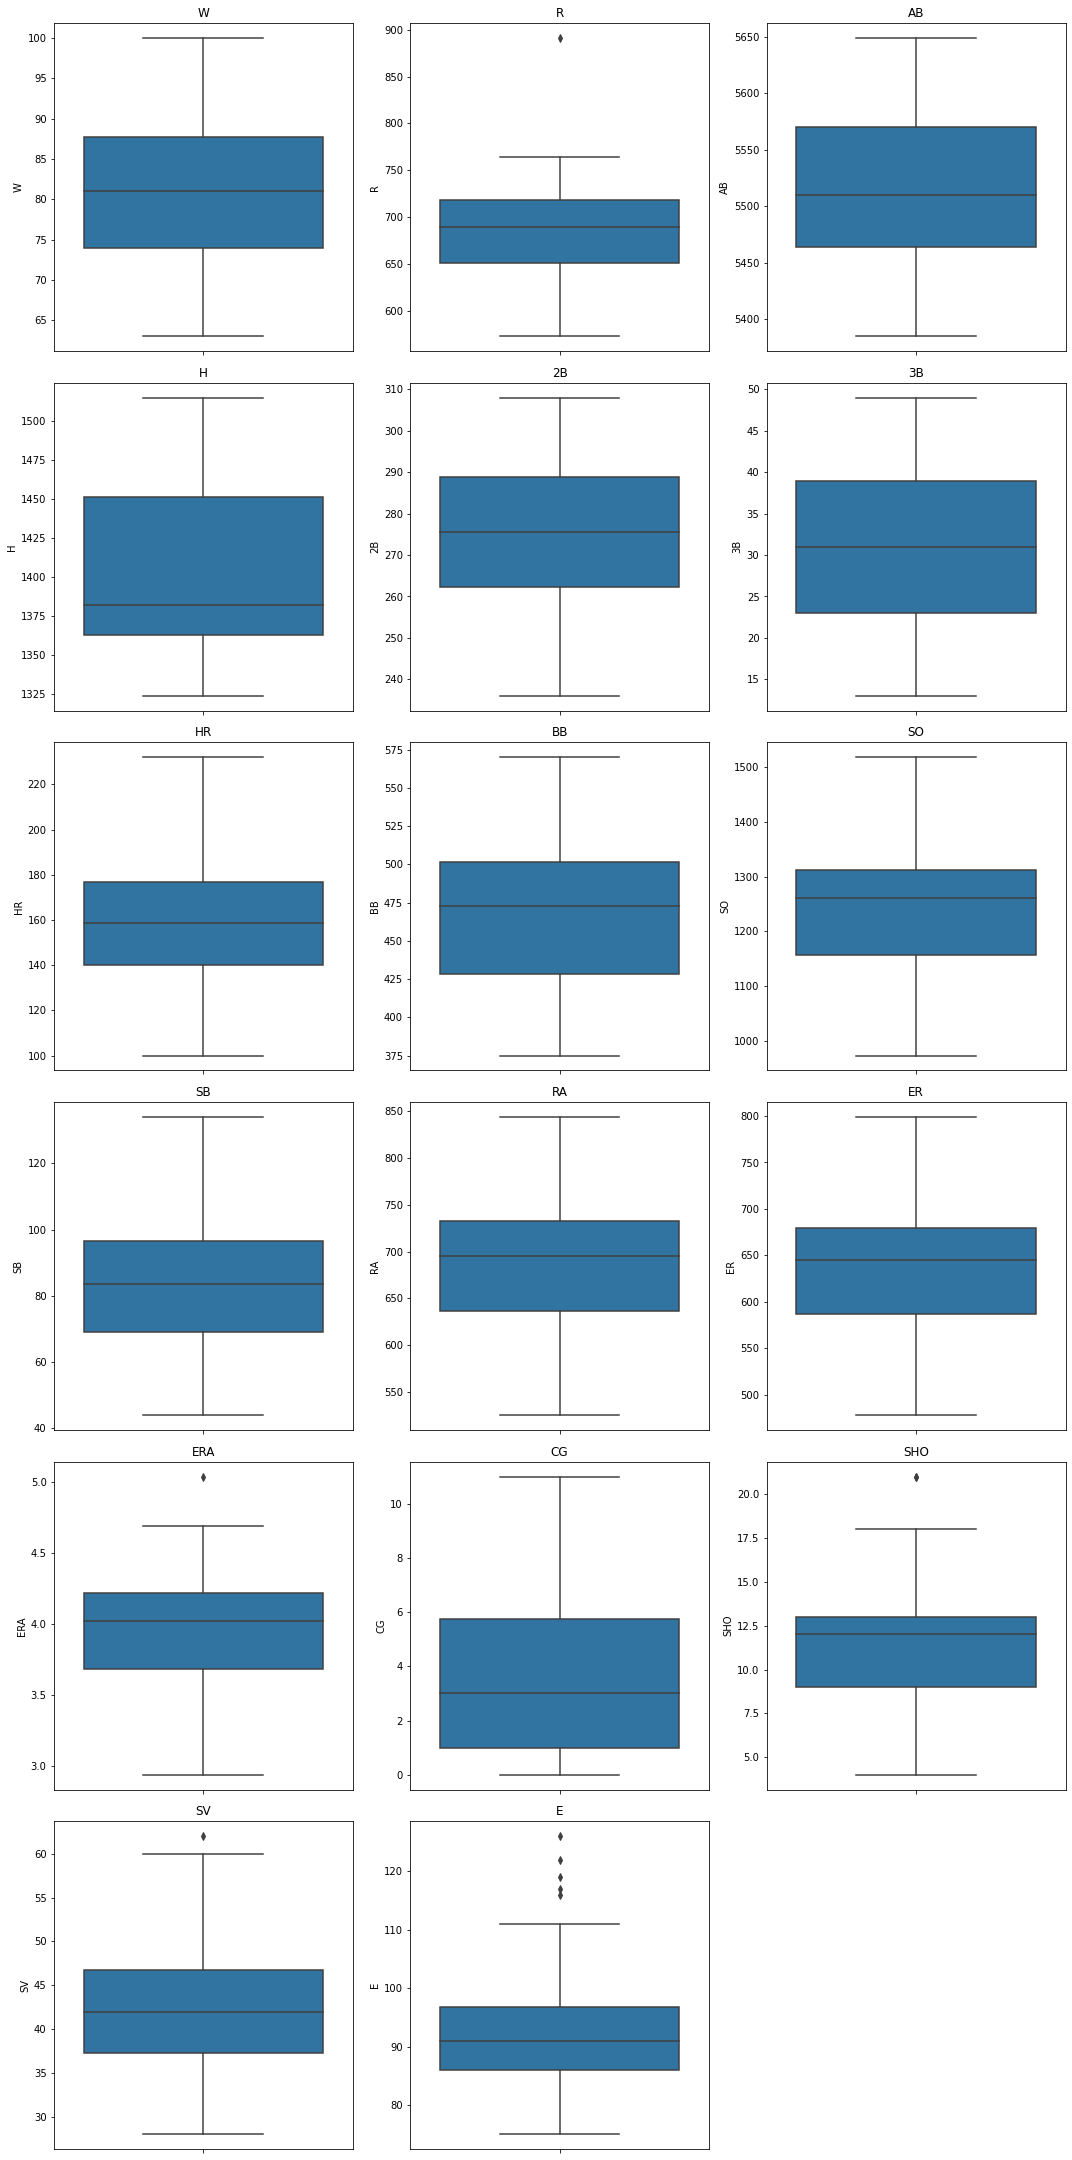

In [120]:
# Create box plots for each numerical feature in order to check the outliers
plt.figure(figsize=(15, 80), facecolor='white')
plotnumber = 1

for feature in df.select_dtypes(include=[np.number]).columns:
    ax = plt.subplot(16, 3, plotnumber)
    sns.boxplot(data=df, y=feature)
    plt.ylabel(feature)
    plt.title(f"{feature}")
    plotnumber += 1

plt.tight_layout()
plt.show()

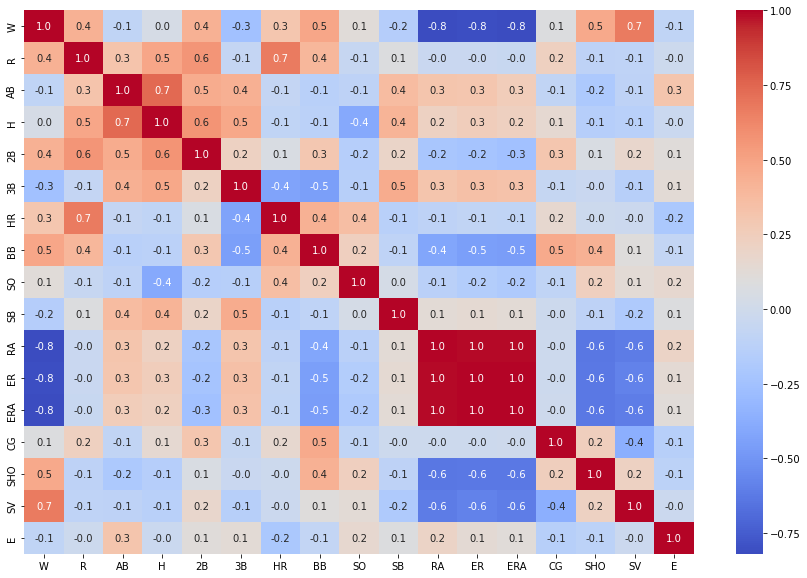

In [121]:
#Correlation Matrix 
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, linecolor="black", cmap="coolwarm", fmt="0.1f")
plt.show()

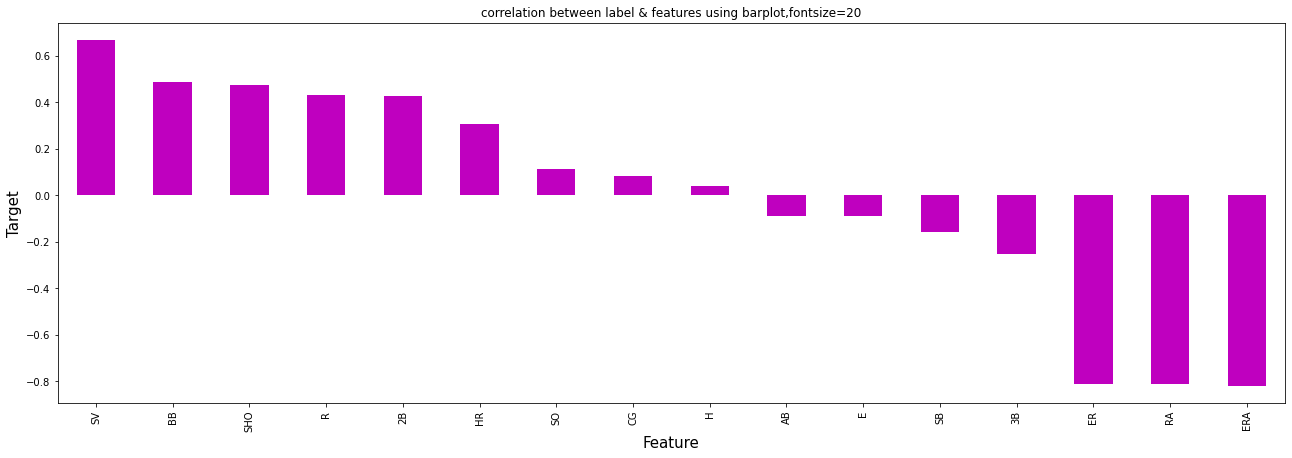

In [122]:
#Visualizing the correlation between label and feature using bar plot.
plt.figure(figsize=(22,7))
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize=15)
plt.ylabel ('Target', fontsize=15)
plt.title("correlation between label & features using barplot,fontsize=20")
plt.show()

In [123]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [124]:
#finding the correlation of features vs target using corrwith.
df.drop('W',axis=1).corrwith(df.W)

R      0.430751
AB    -0.087947
H      0.037612
2B     0.427797
3B    -0.251118
HR     0.307407
BB     0.484342
SO     0.111850
SB    -0.157234
RA    -0.812952
ER    -0.809435
ERA   -0.819600
CG     0.080533
SHO    0.471805
SV     0.666530
E     -0.089485
dtype: float64

<AxesSubplot:title={'center':'Correlation with Target'}>

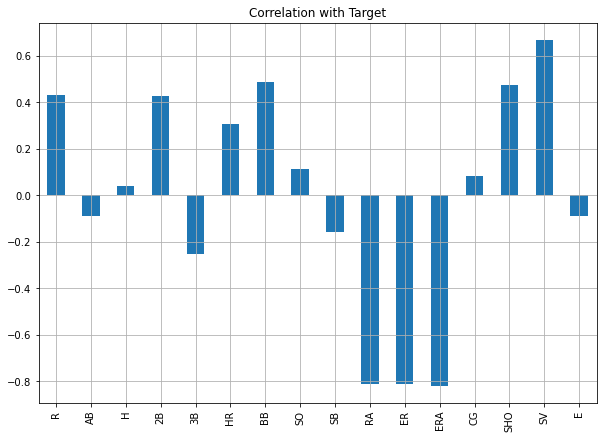

In [125]:
#Visualize the correlation. 
df.drop('W',axis=1).corrwith(df.W).plot(kind='bar',grid=True,figsize=(10,7),
                                             title="Correlation with Target")

# Using Select Percentile to select the features. 


In [126]:
#Instantiate Select Percentile and fit(feature and lable)
from sklearn.feature_selection import SelectPercentile, chi2
X = df.drop(['W'], axis=1)
y = df['W']

SPercentile = SelectPercentile(score_func=chi2, percentile=80)
SPercentile = SPercentile.fit(X,y)


In [127]:
# seperate the function to check the p value 
cols = SPercentile.get_support(indices=True)
print ('Feature Index = ',cols)

features = X.columns[cols]
print('Features = ',list(features))

Feature Index =  [ 0  2  4  5  6  7  8  9 10 12 14 15]
Features =  ['R', 'H', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'CG', 'SV', 'E']


In [128]:
df_scores = pd.DataFrame({'features': X.columns, 'Chi2Score': SPercentile.scores_, 'pValue': SPercentile.pvalues_})
sorted_df_scores = df_scores.sort_values(by='Chi2Score', ascending=False)
print(sorted_df_scores)

   features   Chi2Score        pValue
7        SO  213.268413  8.938748e-33
9        RA  197.781566  9.420381e-30
10       ER  192.499607  9.976463e-29
8        SB  166.938124  8.089020e-24
6        BB  161.137711  1.019445e-22
5        HR  142.024649  3.903996e-19
0         R  137.220468  3.022392e-18
4        3B   77.453674  8.163669e-08
15        E   54.037102  2.646094e-04
2         H   50.277253  8.471974e-04
14       SV   38.328947  2.347677e-02
12       CG   38.019231  2.535108e-02
13      SHO   35.808260  4.314958e-02
3        2B   26.829168  2.633067e-01
1        AB   22.350297  4.991972e-01
11      ERA    1.306697  1.000000e+00


In [129]:
# Creating the subset of the selected features
x = df[features] # Remove the square brackets around 'W' and fix the axis argument
y = df['W'] 

In [130]:
x

,R,H,3B,HR,BB,SO,SB,RA,ER,CG,SV,E
0,724,1497,42,139,383,973,104,641,601,2,56,88
1,696,1349,44,156,439,1264,70,700,653,2,45,86
2,669,1395,29,141,533,1157,86,640,584,11,38,79
3,622,1381,27,136,404,1231,68,701,643,7,37,101
4,689,1515,49,151,455,1259,83,803,746,7,35,86
5,891,1480,17,232,570,1151,88,670,609,7,34,88
6,764,1397,19,212,554,1227,63,698,652,3,48,93
7,713,1370,20,217,418,1331,44,693,646,0,43,77
8,644,1383,32,167,436,1310,87,642,604,1,60,95
9,748,1495,33,161,478,1148,71,753,694,3,40,97


In [131]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [132]:
# Perform feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [133]:
# Instantiate and fitting the model

lr = LinearRegression()
lr.fit(X_train, y_train)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [134]:
# Prection on the test data. 
y_pred1 = lr.predict(X_test)
y_pred2 = rfr.predict(X_test)
y_pred3 = gr.predict(X_test)
y_pred4 = dt.predict(X_test)
df2 = pd.DataFrame({'Actual': y_test, 'Lr': y_pred1, 'rfr': y_pred2, 'gr': y_pred3,'dt':y_pred4,})

In [135]:
df2

,Actual,Lr,rfr,gr,dt
27,79,81.962719,79.53,77.061834,68.0
15,100,103.941951,86.14,92.956731,92.0
23,67,68.544669,74.30,76.007336,68.0
17,97,91.626917,88.29,92.390241,92.0
8,80,92.393842,84.51,92.891552,90.0
9,78,79.985663,80.11,74.881634,88.0


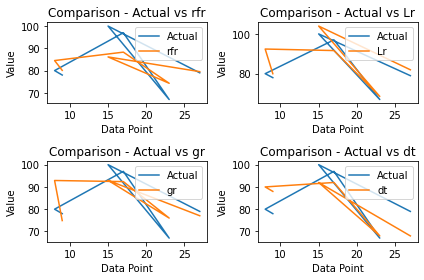

In [136]:
plt.subplot(221)
plt.plot(df2['Actual'].iloc[0:10], label='Actual')
plt.plot(df2['rfr'].iloc[0:10], label="rfr")
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Comparison - Actual vs rfr')
plt.legend()

# Repeat the above code for other subplots (222, 223, 224)
plt.subplot(222)
plt.plot(df2['Actual'].iloc[0:10], label='Actual')
plt.plot(df2['Lr'].iloc[0:10], label="Lr")
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Comparison - Actual vs Lr')
plt.legend()

plt.subplot(223)
plt.plot(df2['Actual'].iloc[0:10], label='Actual')
plt.plot(df2['gr'].iloc[0:10], label="gr")
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Comparison - Actual vs gr')
plt.legend()

plt.subplot(224)
plt.plot(df2['Actual'].iloc[0:10], label='Actual')
plt.plot(df2['dt'].iloc[0:10], label="dt")
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Comparison - Actual vs dt')
plt.legend()

plt.tight_layout()
plt.show()


In [145]:
# Calculating mean squared error (MSE) for each model
mse_lr = mean_squared_error(df2['Actual'], df2['Lr'])
mse_rfr = mean_squared_error(df2['Actual'], df2['rfr'])
mse_gr = mean_squared_error(df2['Actual'], df2['gr'])
mse_dt = mean_squared_error(df2['Actual'], df2['dt'])

# dictionary that stores the MSE values
mse_scores = {
    'Linear Regression': mse_lr,
    'Random Forest': mse_rfr,
    'Gradient Boosting': mse_gr,
    'Decision Tree': mse_dt}

In [146]:
from sklearn.model_selection import cross_val_score

# Assuming 'lr', 'rfr', 'gr', 'dt' are your trained models
models = {'Linear Regression': lr, 'Random Forest Regressor': rfr, 'Gradient Boosting Regressor': gr, 'Decision Tree Regressor': dt}

for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Cross-Validation Scores for {model_name}: ", scores)
    print(f"Average Cross-Validation Score for {model_name}: ", scores.mean())


Cross-Validation Scores for Linear Regression:  [ 0.66391004  0.4909461   0.70518554  0.74283111 -0.03956455]
Average Cross-Validation Score for Linear Regression:  0.5126616478552399
Cross-Validation Scores for Random Forest Regressor:  [0.66591443 0.39227643 0.40125448 0.35416204 0.29692554]
Average Cross-Validation Score for Random Forest Regressor:  0.42210658262813905
Cross-Validation Scores for Gradient Boosting Regressor:  [ 0.67897632 -0.11733753 -0.25443773  0.33957582 -0.34341699]
Average Cross-Validation Score for Gradient Boosting Regressor:  0.06067197714225978
Cross-Validation Scores for Decision Tree Regressor:  [ 0.52084734 -0.20790916  0.05223881 -1.49228395 -0.47211896]
Average Cross-Validation Score for Decision Tree Regressor:  -0.31984518444173754


In [147]:
# To find the best model 
best_model = min(mse_scores, key=mse_scores.get)

print("The best model is:", best_model)

The best model is: Linear Regression


In [148]:
#Model_Prediction  

data_Predict = {
    'R': 696, 'H': 1797, '3B': 29, 'HR': 156,
    'BB': 439, 'SO': 1157, 'SB': 70, 'RA': 720, 'ER': 6.5,
    'CG': 7, 'SV': 50, 'E': 8}

df_pred = pd.DataFrame(data_Predict, index=[0])

In [144]:
new_pred = lr.predict(df_pred )
print(new_pred)

[152.38440358]


In [149]:
import pickle

# Save Model to file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Load Model from file
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)